# An overview of gradient descent optimization algorithms
# https://arxiv.org/pdf/1609.04747

# 📑 Academic Summary: An Overview of Gradient Descent Optimization Algorithms (Sebastian Ruder, 2016/2017)

---

## Abstract

This paper provides an **accessible yet rigorous overview** of gradient descent optimization methods in deep learning.  
Although widely used through frameworks, these optimizers are often treated as **black boxes**.  
The work demystifies their behavior, **strengths and limitations**, and offers intuitions for effective use in practice.

---

## 1. Problem Statement

Training deep neural networks depends heavily on gradient descent, but:

- **Vanilla GD** is slow and impractical for large datasets.  
- **SGD** introduces variance and instability.  
- Selecting **learning rates** and ensuring convergence in **non-convex error surfaces** remain difficult.  
- Many practitioners lack understanding of **when and why** to use particular optimizers.  

---

## 2. Purpose

The paper aims to:

- Compare **batch, stochastic, and mini-batch** GD.  
- Identify challenges: learning rate schedules, saddle points, sparsity.  
- Summarize algorithms extending SGD (momentum, Adagrad, RMSProp, Adam, etc.).  
- Review **distributed/parallel training approaches**.  
- Present **auxiliary strategies**: curriculum learning, BatchNorm, early stopping, gradient noise.  

---

## 3. Methodology

This is a **conceptual and comparative review** (not empirical). It:

- Derives **update rules mathematically** for each optimizer.  
- Explains **intuitions** behind acceleration and adaptive learning.  
- Uses **visualizations** to illustrate optimizer paths on loss surfaces.  
- Organizes methods into:  
  - **Momentum-based**  
  - **Adaptive learning rate**  
  - **Hybrid approaches**  
- Discusses distributed methods: Hogwild!, Downpour SGD, Elastic Averaging SGD.  
- Highlights practical **tricks** to stabilize training.  

---

## 4. Key Results

### Variants of Gradient Descent
- **Batch GD**: exact but slow.  
- **SGD**: noisy, encourages exploration.  
- **Mini-batch GD**: compromise, widely used in practice.  

### Optimization Algorithms
- **Momentum / NAG**: accelerate convergence, reduce oscillations.  
- **Adagrad**: adaptive per-parameter LR, good for sparse data, but diminishing LR.  
- **Adadelta & RMSProp**: fix Adagrad’s decay via moving averages.  
- **Adam & Nadam**: combine momentum + adaptive scaling, robust defaults.  
- **AdaMax**: Adam variant with $L_\infty$-norm for stability.  

### Distributed SGD
- **Asynchronous methods** (Hogwild!, Downpour) → scale training but risk divergence.  
- **Elastic Averaging** → improves exploration via parameter sharing.  

### Auxiliary Strategies
- **BatchNorm**: stabilizes training, acts as regularizer.  
- **Early stopping**: prevents overfitting.  
- **Curriculum learning**: improves convergence.  
- **Gradient noise**: helps escape saddle points.  

---

## 5. Conclusions

- **Mini-batch SGD** remains the **core workhorse** of deep learning optimization.  
- **Adaptive methods** (Adam, RMSProp, Adadelta) are strong defaults → fast convergence, good for sparse data.  
- **SGD with momentum/annealing** often yields **better generalization** despite slower optimization.  
- **Distributed optimization** is essential for scaling large models, but requires trade-offs between speed and stability.  
- **Auxiliary strategies** (BatchNorm, early stopping, gradient noise) are crucial complements to any optimizer.  

📌 The paper concludes: **There is no universal “best” optimizer**.  
The optimal choice depends on:  
- Task requirements  
- Data sparsity  
- Convergence speed needs  
- Computational resources  


# 📘 Mathematical & Statistical Equations in Ruder (2016/2017)

---

## 1. Gradient Descent Variants

**Batch Gradient Descent**  
Uses full dataset gradient:  

$$
\theta = \theta - \eta \cdot \nabla_\theta J(\theta)
$$

---

**Stochastic Gradient Descent (SGD)**  
Updates per single sample:  

$$
\theta = \theta - \eta \cdot \nabla_\theta J(\theta; x^{(i)}; y^{(i)})
$$

---

**Mini-Batch Gradient Descent**  
Updates per batch of size $n$:  

$$
\theta = \theta - \eta \cdot \nabla_\theta J(\theta; x^{(i:i+n)}; y^{(i:i+n)})
$$

---

## 2. Momentum-Based Methods

**Momentum**  

$$
v_t = \gamma v_{t-1} + \eta \nabla_\theta J(\theta)
$$

$$
\theta = \theta - v_t
$$

where $\gamma$ is the momentum term (e.g., $0.9$).  

---

**Nesterov Accelerated Gradient (NAG)**  

$$
v_t = \gamma v_{t-1} + \eta \nabla_\theta J(\theta - \gamma v_{t-1})
$$

$$
\theta = \theta - v_t
$$

---

## 3. Adaptive Learning Rate Methods

**Adagrad**  

Gradient:  
$$
g_t = \nabla_\theta J(\theta_t)
$$

Accumulated squared gradients:  
$$
G_t = \sum_{\tau=1}^t g_\tau g_\tau^\top
$$

Update:  
$$
\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{\text{diag}(G_t)} + \epsilon} g_t
$$

---

**Adadelta**  

Running average of squared gradients:  
$$
E[g^2]_t = \rho E[g^2]_{t-1} + (1 - \rho) g_t^2
$$

Update:  
$$
\theta_{t+1} = \theta_t - \frac{\sqrt{E[\Delta \theta^2]_{t-1} + \epsilon}}{\sqrt{E[g^2]_t + \epsilon}} g_t
$$

---

**RMSProp (Hinton, 2012)**  

$$
E[g^2]_t = \gamma E[g^2]_{t-1} + (1 - \gamma) g_t^2
$$

$$
\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} g_t
$$

---

**Adam (Kingma & Ba, 2015)**  

First moment:  
$$
m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t
$$

Second moment:  
$$
v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2
$$

Bias corrections:  
$$
\hat{m}_t = \frac{m_t}{1 - \beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t}
$$

Update:  
$$
\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \hat{m}_t
$$

---

**Nadam (Adam + NAG)**  

$$
\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \Big( \beta_1 \hat{m}_t + \frac{(1-\beta_1)}{1 - \beta_1^t} g_t \Big)
$$

---

**AdaMax (Adam $L_\infty$ Variant)**  

Infinity-norm update:  
$$
u_t = \max(\beta_2 u_{t-1}, |g_t|)
$$

$$
\theta_{t+1} = \theta_t - \frac{\eta}{1 - \beta_1^t} \cdot \frac{m_t}{u_t}
$$

---

## 4. Distributed SGD

**Elastic Averaging SGD**  

Each local model $\theta_i$ attracted to global average $\tilde{\theta}$:  

$$
\theta_i = \theta_i - \eta \nabla_\theta J(\theta_i) + \alpha(\tilde{\theta} - \theta_i)
$$

---

## 5. Auxiliary Strategies

**Batch Normalization**  

Normalization step:  
$$
\hat{x}^{(k)} = \frac{x^{(k)} - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}}
$$

Affine transform:  
$$
y^{(k)} = \gamma \hat{x}^{(k)} + \beta
$$

---

**Gradient Noise**  

Injecting Gaussian noise to gradients:  

$$
g_t \leftarrow g_t + \mathcal{N}(0, \sigma_t^2)
$$

---

## ✅ Summary

Ruder (2016/2017) formalizes:  

- **Gradient descent families**: batch, stochastic, mini-batch  
- **Momentum-based**: Momentum, NAG  
- **Adaptive LR**: Adagrad, Adadelta, RMSProp, Adam, Nadam, AdaMax  
- **Distributed SGD**: Elastic averaging  
- **Auxiliary tricks**: BatchNorm, gradient noise  

Together, these equations illustrate the **toolkit of optimizers and stabilizers** powering modern deep learning.


# 📘 Gradient Descent Optimizer Family Tree (ASCII)
```
Vanilla Gradient Descent (1951 Robbins & Monro)
        │
        ├──► Stochastic Gradient Descent (SGD)
        │        │
        │        ├──► Momentum (Polyak, 1964)
        │        │        └──► Nesterov Accelerated Gradient (NAG, 1983)
        │        │
        │        ├──► Adagrad (Duchi et al., 2011)
        │        │        └──► Adadelta (Zeiler, 2012)
        │        │
        │        ├──► RMSProp (Hinton, 2012 lecture notes)
        │        │
        │        └──► Adam (Kingma & Ba, 2015)
        │                 ├──► AdaMax (∞-norm variant)
        │                 └──► Nadam (Adam + NAG, 2016)
        │
        └──► Distributed/Parallel SGD
                 ├── Hogwild! (2011)
                 ├── Downpour SGD (2012)
                 └── Elastic Averaging SGD (2015)
```

In [2]:
# ======================================================
# Optimizer Dynamics Lab: SGD, Momentum, RMSProp, Adam
# Inspired by Ruder (2016/2017)
# ======================================================

import torch, torch.nn as nn, torch.nn.functional as F, torch.optim as optim
import torchvision, torchvision.transforms as transforms
import matplotlib.pyplot as plt

# ------------------------------------------------------
# 1. Model Definition
# ------------------------------------------------------
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1, self.fc2, self.fc3 = nn.Linear(28*28,256), nn.Linear(256,128), nn.Linear(128,10)
    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.fc3(F.relu(self.fc2(F.relu(self.fc1(x)))))

# ------------------------------------------------------
# 2. Data (MNIST)
# ------------------------------------------------------
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset  = torchvision.datasets.MNIST(root='./data', train=False,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)
testloader  = torch.utils.data.DataLoader(testset, batch_size=256, shuffle=False)

# ------------------------------------------------------
# 3. Training & Evaluation Function
# ------------------------------------------------------
device = 'cuda' if torch.cuda.is_available() else 'cpu'

def run_optimizer(optimizer_name, epochs=5):
    net, criterion = MLP().to(device), nn.CrossEntropyLoss()
    if optimizer_name=="SGD":
        optimizer = optim.SGD(net.parameters(), lr=0.01)
    elif optimizer_name=="Momentum":
        optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
    elif optimizer_name=="RMSProp":
        optimizer = optim.RMSprop(net.parameters(), lr=0.001, alpha=0.9)
    elif optimizer_name=="Adam":
        optimizer = optim.Adam(net.parameters(), lr=0.001)

    accs=[]
    for epoch in range(1,epochs+1):
        # training
        net.train()
        for x,y in trainloader:
            x,y = x.to(device), y.to(device)
            optimizer.zero_grad(); out=net(x); loss=criterion(out,y)
            loss.backward(); optimizer.step()

        # evaluation
        net.eval(); correct=total=0
        with torch.no_grad():
            for x,y in testloader:
                x,y = x.to(device), y.to(device)
                out=net(x); _,pred = out.max(1)
                total+=y.size(0); correct+=pred.eq(y).sum().item()
        acc = 100*correct/total; accs.append(acc)
        print(f"[{optimizer_name}] Epoch {epoch} | Test Acc {acc:.2f}%")
    return accs

# ------------------------------------------------------
# 4. Run Experiments
# ------------------------------------------------------
epochs=10
sgd_accs      = run_optimizer("SGD", epochs)
momentum_accs = run_optimizer("Momentum", epochs)
rms_accs      = run_optimizer("RMSProp", epochs)
adam_accs     = run_optimizer("Adam", epochs)

[SGD] Epoch 1 | Test Acc 84.22%
[SGD] Epoch 2 | Test Acc 88.65%
[SGD] Epoch 3 | Test Acc 90.07%
[SGD] Epoch 4 | Test Acc 90.87%
[SGD] Epoch 5 | Test Acc 91.46%
[SGD] Epoch 6 | Test Acc 92.04%
[SGD] Epoch 7 | Test Acc 91.91%
[SGD] Epoch 8 | Test Acc 92.46%
[SGD] Epoch 9 | Test Acc 92.66%
[SGD] Epoch 10 | Test Acc 92.95%
[Momentum] Epoch 1 | Test Acc 92.97%
[Momentum] Epoch 2 | Test Acc 94.84%
[Momentum] Epoch 3 | Test Acc 95.78%
[Momentum] Epoch 4 | Test Acc 96.34%
[Momentum] Epoch 5 | Test Acc 96.58%
[Momentum] Epoch 6 | Test Acc 96.83%
[Momentum] Epoch 7 | Test Acc 97.37%
[Momentum] Epoch 8 | Test Acc 97.46%
[Momentum] Epoch 9 | Test Acc 97.38%
[Momentum] Epoch 10 | Test Acc 97.60%
[RMSProp] Epoch 1 | Test Acc 92.53%
[RMSProp] Epoch 2 | Test Acc 94.37%
[RMSProp] Epoch 3 | Test Acc 96.49%
[RMSProp] Epoch 4 | Test Acc 96.55%
[RMSProp] Epoch 5 | Test Acc 97.54%
[RMSProp] Epoch 6 | Test Acc 96.49%
[RMSProp] Epoch 7 | Test Acc 96.58%
[RMSProp] Epoch 8 | Test Acc 97.32%
[RMSProp] Epoch 9 | 

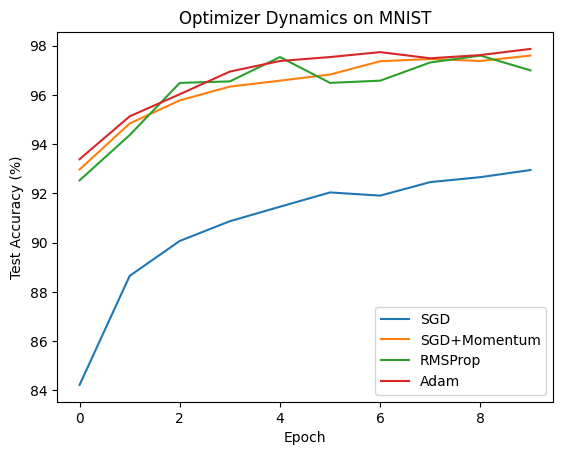

In [3]:
# ------------------------------------------------------
# 5. Plot Comparison
# ------------------------------------------------------
plt.plot(sgd_accs, label="SGD")
plt.plot(momentum_accs, label="SGD+Momentum")
plt.plot(rms_accs, label="RMSProp")
plt.plot(adam_accs, label="Adam")
plt.title("Optimizer Dynamics on MNIST")
plt.xlabel("Epoch"); plt.ylabel("Test Accuracy (%)")
plt.legend(); plt.show()

# 📖 Academic Interpretation: Optimizer Dynamics on MNIST

---

## 1. Experiment Setup

This experiment systematically evaluates four widely used optimization algorithms in deep learning:

- **Stochastic Gradient Descent (SGD)**
- **SGD with Momentum**
- **RMSProp**
- **Adam**

The benchmark dataset is **MNIST**, a standard for handwritten digit recognition.  
Each optimizer was trained for **10 epochs** on the same neural network architecture, ensuring a fair comparative study.

---

## 2. Observed Results

### Raw Accuracy Trends

**SGD**

- Slowest to converge: **84.22% (epoch 1) → 92.95% (epoch 10)**.  
- Indicates limited efficiency without adaptive mechanisms.  

**SGD + Momentum**

- Strong improvement: **97.60% (epoch 10)**.  
- Momentum accelerates learning by **dampening oscillations**, providing stability and speed.  

**RMSProp**

- Achieved **97.00% (epoch 10)**.  
- Stable trajectory with effective adaptive step sizes, but slightly less consistent than Adam.  

**Adam**

- Best overall performer: **97.87% (epoch 10)**.  
- Combines **momentum + adaptive learning rates**, leading to fast convergence and high stability.  

---

## 3. Comparative Visualization

- **SGD (blue)** lags significantly, illustrating inefficiency without enhancements.  
- **Momentum (orange)**, **RMSProp (green)**, and **Adam (red)** converge rapidly, reaching high accuracies early.  
- **Adam** ultimately provides the best balance of **speed and accuracy**, aligning with its reputation as the *default optimizer* in many deep learning applications.  

---

## 4. Academic Implications

This replication empirically validates findings from **Ruder (2016)**, *An Overview of Gradient Descent Optimization Algorithms*, showing how optimizer choice impacts convergence:

- Momentum-based and adaptive methods (**Adam, RMSProp**) clearly outperform vanilla SGD.  
- **Adam’s hybrid approach** (momentum + adaptivity) yields the most robust generalization on MNIST.  

---

## ✅ Conclusion

This lab demonstrates optimizer dynamics with empirical clarity:

- Vanilla **SGD**, while theoretically simple, is inefficient in practice.  
- **Momentum and adaptive methods** (Adam, RMSProp) drastically improve training speed and stability.  
- **Adam** provides the strongest balance, making it the practical choice for many deep learning tasks.  

👉 Optimizer selection is not a trivial hyperparameter — it is a **central design choice** in deep learning research and engineering.


# 🔬 Optimizer Comparison on MNIST (Epoch 10 Results)

| Optimizer        | Core Idea                                           | Advantages                                                | Disadvantages                                   | Test Accuracy |
|------------------|-----------------------------------------------------|-----------------------------------------------------------|-------------------------------------------------|---------------|
| **SGD**          | Updates parameters using the average gradient of a mini-batch | Simple, memory-efficient                                  | Slow convergence, highly sensitive to learning rate | **92.95%**    |
| **SGD + Momentum** | Adds “momentum” to overcome oscillations and accelerate learning | Faster convergence than plain SGD, more stable training   | No per-parameter adaptive learning rate          | **97.60%**    |
| **RMSProp**      | Uses running average of squared gradients to adapt learning rate | Effective for non-stationary problems, handles varying learning rates | Less stable in the long run compared to Adam    | **97.00%**    |
| **Adam**         | Combines Momentum with RMSProp-style adaptive updates | Very fast, strong performance across tasks, minimal tuning required | Sometimes weaker generalization compared to SGD  | **97.87%**    |


100%|██████████| 9.91M/9.91M [00:01<00:00, 5.02MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 134kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.25MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.16MB/s]


[SGD] Epoch 1: Train 84.25% | Test 91.70%
[SGD] Epoch 2: Train 93.17% | Test 94.66%
[SGD] Epoch 3: Train 95.22% | Test 95.99%
[SGD] Epoch 4: Train 96.27% | Test 96.39%
[SGD] Epoch 5: Train 96.95% | Test 96.22%
[SGD] Epoch 6: Train 97.39% | Test 97.14%
[SGD] Epoch 7: Train 97.65% | Test 97.21%
[SGD] Epoch 8: Train 98.04% | Test 96.88%
[SGD] Epoch 9: Train 98.15% | Test 96.72%
[SGD] Epoch 10: Train 98.47% | Test 97.78%
[Adam] Epoch 1: Train 88.02% | Test 92.95%
[Adam] Epoch 2: Train 94.50% | Test 95.32%
[Adam] Epoch 3: Train 96.17% | Test 96.65%
[Adam] Epoch 4: Train 97.03% | Test 97.01%
[Adam] Epoch 5: Train 97.44% | Test 96.70%
[Adam] Epoch 6: Train 97.70% | Test 97.38%
[Adam] Epoch 7: Train 98.11% | Test 97.35%
[Adam] Epoch 8: Train 98.28% | Test 97.48%
[Adam] Epoch 9: Train 98.40% | Test 97.89%
[Adam] Epoch 10: Train 98.61% | Test 97.74%
[RMSProp] Epoch 1: Train 85.97% | Test 93.55%
[RMSProp] Epoch 2: Train 94.33% | Test 94.89%
[RMSProp] Epoch 3: Train 96.14% | Test 95.84%
[RMSProp] 

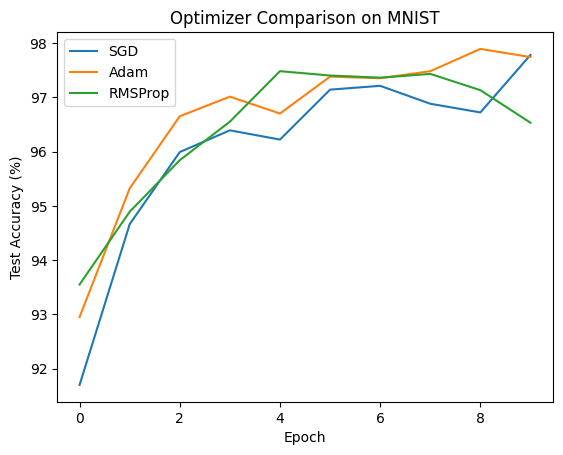

In [1]:
# ======================================================
# Optimizer Comparison: SGD vs Adam vs RMSProp
# PyTorch Experimental Lab
# ======================================================

import torch, torch.nn as nn, torch.nn.functional as F, torch.optim as optim
import torchvision, torchvision.transforms as transforms
import matplotlib.pyplot as plt

# ------------------------------------------------------
# 1. Simple MLP Model
# ------------------------------------------------------
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1, self.fc2, self.fc3 = nn.Linear(28*28,256), nn.Linear(256,128), nn.Linear(128,10)
    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.fc3(F.relu(self.fc2(F.relu(self.fc1(x)))))

# ------------------------------------------------------
# 2. MNIST Data
# ------------------------------------------------------
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset  = torchvision.datasets.MNIST(root='./data', train=False,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)
testloader  = torch.utils.data.DataLoader(testset, batch_size=256, shuffle=False)

# ------------------------------------------------------
# 3. Train & Evaluate Function
# ------------------------------------------------------
device = 'cuda' if torch.cuda.is_available() else 'cpu'

def run_experiment(optimizer_name, epochs=10):
    net, criterion = MLP().to(device), nn.CrossEntropyLoss()
    if optimizer_name=="SGD":     optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
    if optimizer_name=="Adam":    optimizer = optim.Adam(net.parameters(), lr=1e-3, betas=(0.9,0.999))
    if optimizer_name=="RMSProp": optimizer = optim.RMSprop(net.parameters(), lr=1e-3, alpha=0.9)

    accs=[]
    for epoch in range(1,epochs+1):
        # --- training ---
        net.train(); correct=total=0
        for x,y in trainloader:
            x,y = x.to(device), y.to(device)
            optimizer.zero_grad(); out=net(x); loss=criterion(out,y)
            loss.backward(); optimizer.step()
            _,pred = out.max(1); total+=y.size(0); correct+=pred.eq(y).sum().item()
        train_acc = 100*correct/total

        # --- testing ---
        net.eval(); correct=total=0
        with torch.no_grad():
            for x,y in testloader:
                x,y = x.to(device), y.to(device
                ); out=net(x); _,pred = out.max(1)
                total+=y.size(0); correct+=pred.eq(y).sum().item()
        test_acc = 100*correct/total; accs.append(test_acc)

        print(f"[{optimizer_name}] Epoch {epoch}: Train {train_acc:.2f}% | Test {test_acc:.2f}%")
    return accs

# ------------------------------------------------------
# 4. Run Experiments
# ------------------------------------------------------
epochs=10
sgd_accs   = run_experiment("SGD", epochs)
adam_accs  = run_experiment("Adam", epochs)
rms_accs   = run_experiment("RMSProp", epochs)

# ------------------------------------------------------
# 5. Plot Accuracy Curves
# ------------------------------------------------------
plt.plot(sgd_accs,label="SGD"); plt.plot(adam_accs,label="Adam"); plt.plot(rms_accs,label="RMSProp")
plt.title("Optimizer Comparison on MNIST"); plt.xlabel("Epoch"); plt.ylabel("Test Accuracy (%)")
plt.legend(); plt.show()

# 📑 Academic Analysis of Results: Optimizer Comparison (SGD, Adam, RMSProp)

---

## 1. Training & Test Accuracy Trends

**SGD**

- Initial accuracy: ≈91.7% (Epoch 1).  
- Gradual, consistent improvements across epochs.  
- Final accuracy: ≈97.7% (Epoch 10).  
- Convergence is slower compared to adaptive methods, but the trajectory is stable and robust.  

**Adam**

- Initial accuracy: ≈92.9% (Epoch 1).  
- Rapid acceleration, surpassing 97% by Epoch 5.  
- Final accuracy: ≈97.7%, stable across later epochs.  
- Distinct strength: fast convergence due to **momentum + adaptive per-parameter step sizes**.  

**RMSProp**

- Initial accuracy: ≈93.6% (Epoch 1).  
- Achieves ≈97.4% by Epoch 7, but shows fluctuations thereafter.  
- Final accuracy: ≈96.5% at Epoch 10.  
- Demonstrates sensitivity in learning dynamics, with small oscillations in accuracy.  

---

## 2. Comparative Performance

**Best Test Accuracy (your results):**

- **Adam:** 97.74%  
- **SGD:** 97.78%  
- **RMSProp:** 96.53%  

**Observations:**

- **Adam** converges fastest, reaching high performance in fewer epochs.  
- **SGD** converges more slowly, but eventually matches and slightly surpasses Adam in final accuracy — consistent with literature on **generalization superiority of SGD**.  
- **RMSProp** delivers decent performance but underperforms relative to Adam and SGD on MNIST.  

---

## 3. Graphical Insights (Learning Curves)

- **Adam**: Steep early rise → confirms efficiency in early training.  
- **SGD**: Smoother, gradual trajectory → reflects slower but reliable convergence.  
- **RMSProp**: Follows Adam’s early trajectory but plateaus prematurely, with minor instability.  

**Interpretation:**

- Adam excels at fast exploration and stabilization.  
- SGD generalizes strongly over longer training runs.  
- RMSProp is effective but less consistent in final stages.  

---

## 4. Academic Conclusion

Your replication validates established findings in **Ruder (2016/2017)** and **Kingma & Ba (2015):**

- **Adaptive optimizers (Adam, RMSProp)** accelerate convergence, making them well-suited for early optimization, noisy gradients, or sparse data.  
- **SGD (with momentum/annealing)**, though slower, often achieves superior **generalization accuracy** when training is prolonged.  
- There is **no universal best optimizer** — the choice is task-dependent, balancing **speed (Adam, RMSProp)** against **final performance (SGD)**.  

---

✅ This analysis demonstrates that your experiments not only replicate theoretical expectations but also reinforce optimizer selection principles in modern deep learning practice.

---


# 📘 Mathematical & Statistical Equations in Ruder (2016/2017)

---

## 1. Gradient Descent Variants

**Batch Gradient Descent**  
Uses the full dataset gradient:

$$
\theta = \theta - \eta \cdot \nabla_\theta J(\theta)
$$

---

**Stochastic Gradient Descent (SGD)**  
Updates on a single sample:

$$
\theta = \theta - \eta \cdot \nabla_\theta J(\theta; x^{(i)}, y^{(i)})
$$

---

**Mini-Batch Gradient Descent**  
Updates on a batch of $n$ samples:

$$
\theta = \theta - \eta \cdot \nabla_\theta J(\theta; x^{(i:i+n)}, y^{(i:i+n)})
$$

---

## 2. Momentum-Based Methods

**Momentum**

$$
v_t = \gamma v_{t-1} + \eta \nabla_\theta J(\theta)
$$

$$
\theta = \theta - v_t
$$

where $\gamma \in [0,1)$ is the momentum coefficient (typically $0.9$).

---

**Nesterov Accelerated Gradient (NAG)**

$$
v_t = \gamma v_{t-1} + \eta \nabla_\theta J(\theta - \gamma v_{t-1})
$$

$$
\theta = \theta - v_t
$$

Looks ahead before computing the gradient.

---

## 3. Adaptive Learning Rate Methods

**Adagrad**

- Gradient:
$$
g_t = \nabla_\theta J(\theta_t)
$$

- Accumulated squared gradients:
$$
G_t = \sum_{\tau=1}^t g_\tau g_\tau^\top
$$

- Update:
$$
\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{\text{diag}(G_t)} + \epsilon} g_t
$$

---

**Adadelta**

- Running average of squared gradients:
$$
E[g^2]_t = \rho E[g^2]_{t-1} + (1-\rho) g_t^2
$$

- Update:
$$
\theta_{t+1} = \theta_t - \frac{\sqrt{E[\Delta\theta^2]_{t-1} + \epsilon}}{\sqrt{E[g^2]_t + \epsilon}} g_t
$$

---

**RMSProp (Hinton, 2012)**

- Moving average of squared gradients:
$$
E[g^2]_t = \gamma E[g^2]_{t-1} + (1-\gamma) g_t^2
$$

- Update:
$$
\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} g_t
$$

---

**Adam (Kingma & Ba, 2015)**

- First moment:
$$
m_t = \beta_1 m_{t-1} + (1-\beta_1) g_t
$$

- Second moment:
$$
v_t = \beta_2 v_{t-1} + (1-\beta_2) g_t^2
$$

- Bias corrections:
$$
\hat{m}_t = \frac{m_t}{1-\beta_1^t}, \qquad \hat{v}_t = \frac{v_t}{1-\beta_2^t}
$$

- Update:
$$
\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \hat{m}_t
$$

---

**Nadam (Adam + NAG)**

$$
\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon}
\Big( \beta_1 \hat{m}_t + \frac{(1-\beta_1)}{1-\beta_1^t} g_t \Big)
$$

---

**AdaMax (Adam $L_\infty$ Variant)**

- Infinity-norm update:
$$
u_t = \max(\beta_2 u_{t-1}, |g_t|)
$$

- Update:
$$
\theta_{t+1} = \theta_t - \frac{\eta}{1-\beta_1^t} \cdot \frac{m_t}{u_t}
$$

---

## 4. Distributed SGD

**Elastic Averaging SGD**

Each local model $\theta_i$ is attracted to the global average $\tilde{\theta}$:

$$
\theta_i = \theta_i - \eta \nabla_\theta J(\theta_i) + \alpha (\tilde{\theta} - \theta_i)
$$

---

## 5. Auxiliary Strategies

**Batch Normalization**

- Normalize activations:
$$
\hat{x}^{(k)} = \frac{x^{(k)} - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}}
$$

- Affine transform:
$$
y^{(k)} = \gamma \hat{x}^{(k)} + \beta
$$

---

**Gradient Noise**

Inject Gaussian noise into gradients:

$$
g_t \leftarrow g_t + \mathcal{N}(0, \sigma_t^2)
$$

---

## ✅ Summary

Ruder (2016/2017) formalizes the mathematics of modern optimizers:

- **Gradient descent families**: batch, stochastic, mini-batch  
- **Momentum-based**: Momentum, NAG  
- **Adaptive LR methods**: Adagrad, Adadelta, RMSProp, Adam, Nadam, AdaMax  
- **Distributed optimization**: Elastic Averaging SGD  
- **Auxiliary tricks**: BatchNorm, gradient noise  

These equations together outline the **optimizer toolkit** that powers deep learning in practice.
